## Fake News Detection using Natural Language Processing
                                                                                                                  04/05/2024

![Python logo](https://miro.medium.com/v2/resize:fit:1400/1*RGVPc-MT0q_DCHCavFRHvA.jpeg)

## Life cycle of Machine Learnig Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratory Data Analysis
- Data Preprocessing
- Model Training
- Choose The Best Model

## 1. Problem Statement
-  I'm embarking on a project where I'll leverage a CSV dataset containing four columns to develop a sophisticated 
   machine    learning model. This model will be designed to effectively classify news articles as either authentic or 
   fabricated.   By harnessing the power of data and machine learning algorithms, My aim is to create a robust tool that 
   can accurately discern between real and fake news, thereby contributing to the fight against misinformation.

### 2. Data Collection
- Dataset is collected from Kaggle.com.
- Dataset consists of 72134 rows, 4 columns.

### Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

#### Import the CSV Data as Pandas DataFrame

In [2]:
data=pd.read_csv("Dataset.csv")

#### Show Top 5 Records

In [3]:
data.head()

,id,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


#### Shape of the dataset

In [4]:
data.shape

(72134, 4)

#### Attributes in the dataset

In [5]:
data.columns

Index(['id', 'title', 'text', 'label'], dtype='object')

#### About the dataset
- id: unique id for a news article
- title: the title of a news article
- text: the text of the article; could be incomplete
- label: a label that marks whether the news article is real or fake
- 1: Fake news
- 0: real News

## 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### Check missing values

In [6]:
# checking if any null in the dataset
data.isna().sum()

id         0
title    558
text      39
label      0
dtype: int64

In [7]:
# droping null values in the dataset
data.dropna(axis=0,inplace=True)

In [8]:
# after droping, checking if any null values
data.isna().sum()

id       0
title    0
text     0
label    0
dtype: int64

In [9]:
# after removing null values loading the dataset
data

,id,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [10]:
# reseting the index 
data.reset_index(inplace=True)

In [11]:
# arange the id attribute in the sequence
data['id'] = range(1, len(data) + 1)
data.drop(columns=['index'], inplace=True)
print(data)

          id                                              title  \
0          1  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1          2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
2          3  Bobby Jindal, raised Hindu, uses story of Chri...   
3          4  SATAN 2: Russia unvelis an image of its terrif...   
4          5  About Time! Christian Group Sues Amazon and SP...   
...      ...                                                ...   
71532  71533  Russians steal research on Trump in hack of U....   
71533  71534   WATCH: Giuliani Demands That Democrats Apolog...   
71534  71535  Migrants Refuse To Leave Train At Refugee Camp...   
71535  71536  Trump tussle gives unpopular Mexican leader mu...   
71536  71537  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  label  
0      No comment is expected from Barack Obama Membe...      1  
1       Now, most of the demonstrators gathered last ...      1

### Check Duplicates

In [12]:
data.duplicated().sum()

0

#### There are no duplicates values in the data set

### Check data types

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71537 entries, 0 to 71536
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      71537 non-null  int64 
 1   title   71537 non-null  object
 2   text    71537 non-null  object
 3   label   71537 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


### Checking the number of unique values of each column

In [14]:
data.nunique()

id       71537
title    62308
text     62200
label        2
dtype: int64

### Check statistics of data set

In [15]:
# describe the dataset
data.describe()

,id,label
count,71537.000000,71537.000000
mean,35769.000000,0.510351
std,20651.097441,0.499896
min,1.000000,0.000000
25%,17885.000000,0.000000
50%,35769.000000,1.000000
75%,53653.000000,1.000000
max,71537.000000,1.000000


- Minimum and Maximum values of id is 0.000000 and 72133.000000
- Count of id and label is same 72134.000000

## 4. Exploratory data analysis

In [16]:
# counting no.of rows
data.count()

id       71537
title    71537
text     71537
label    71537
dtype: int64

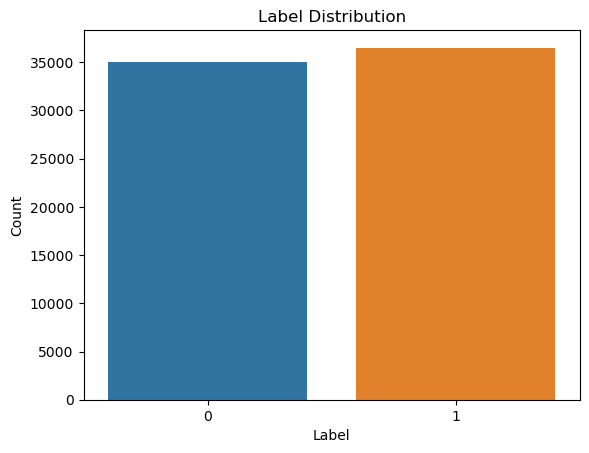

In [17]:
# visualizing the no.of 0's and 1's in the label attribute
sns.countplot(data=data, x='label') 
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

In [18]:
# counting no.of 0's and 1's in the label attribute
data['label'].value_counts()

1    36509
0    35028
Name: label, dtype: int64

## 5. Data Preprocessing

### Stemming

In [19]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [20]:
data['content'] = data['title']

In [21]:
ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [22]:
# applying stemming to the content
data['content'] = data['content'].apply(stemming)

In [23]:
# content of the data
data['content']

0        law enforc high alert follow threat cop white ...
1        unbeliev obama attorney gener say charlott rio...
2        bobbi jindal rais hindu use stori christian co...
3        satan russia unv imag terrifi new supernuk wes...
4        time christian group sue amazon splc design ha...
                               ...                        
71532    russian steal research trump hack u democrat p...
71533    watch giuliani demand democrat apolog trump ra...
71534         migrant refus leav train refuge camp hungari
71535    trump tussl give unpopular mexican leader much...
71536           goldman sach endors hillari clinton presid
Name: content, Length: 71537, dtype: object

## 6. Model Training

### Separating the data and label

In [24]:
x = data['content']
y = data['label']

### spliting the dataset

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle = True, random_state=1)

### feature extraction of the dataset

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


In [27]:
x_train

26335    republican lawmak grab woman genit tell trump ...
47342                  could romant heroin russian classic
32556    cathol priest goe partial birth abort hillari ...
19195    knew close clinton friend warn agre allow sexu...
46679    mother fight discov fate dead babi bodi find e...
                               ...                        
49100    clinton deleg win dem nomin ap report sander q...
20609    cb hit job new tax bill backfir account meet m...
21440    uk may meet bill clinton discuss northern irel...
50057          obama hillari want libya gaddafi toppl kill
5192     u n secur council meet north korea missil test...
Name: content, Length: 57229, dtype: object

In [28]:
x_train.shape

(57229,)

In [29]:
y_train

26335    1
47342    1
32556    1
19195    1
46679    0
        ..
49100    0
20609    1
21440    0
50057    1
5192     0
Name: label, Length: 57229, dtype: int64

In [30]:
y_train.shape

(57229,)

In [31]:
x_test

6882     brook trump side foreign leader us presid isra...
62919    basebal player call obama f cking watermelon e...
53149    comey law enforc need better job understand jo...
8116     kkk grand wizard david duke thank trump champi...
57957    exclus u memo weaken guidelin protect immigr c...
                               ...                        
6783        trump angrili goe hillari compet misspel tweet
19847    sign languag man caus stir social media gov sc...
11170     bannon role trump administr set critic firestorm
69920                                      govern lie movi
30700        texa cop execut nake black teen say arm video
Name: content, Length: 14308, dtype: object

In [32]:
x_test.shape

(14308,)

In [33]:
y_test

6882     0
62919    1
53149    0
8116     1
57957    0
        ..
6783     1
19847    1
11170    0
69920    1
30700    1
Name: label, Length: 14308, dtype: int64

In [34]:
y_test.shape

(14308,)

In [35]:
xv_train

<57229x18034 sparse matrix of type '<class 'numpy.float64'>'
	with 502706 stored elements in Compressed Sparse Row format>

In [36]:
xv_train.shape

(57229, 18034)

In [37]:
xv_test

<14308x18034 sparse matrix of type '<class 'numpy.float64'>'
	with 124285 stored elements in Compressed Sparse Row format>

In [38]:
xv_test.shape

(14308, 18034)

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [40]:
pred_lr = LR.predict(xv_test)
pred_lr

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [41]:
lr_acc = LR.score(xv_test,y_test)
lr_acc

0.9018730779983226

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6969
           1       0.90      0.91      0.91      7339

    accuracy                           0.90     14308
   macro avg       0.90      0.90      0.90     14308
weighted avg       0.90      0.90      0.90     14308



### Decision Tree 

In [43]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [44]:
pred_dt = DT.predict(xv_test)

In [45]:
pred_dt

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [46]:
dt_acc = DT.score(xv_test,y_test)
dt_acc

0.8711909421302768

In [47]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      6969
           1       0.87      0.88      0.88      7339

    accuracy                           0.87     14308
   macro avg       0.87      0.87      0.87     14308
weighted avg       0.87      0.87      0.87     14308



### Gradient Boosting Classifier 

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

GD = GradientBoostingClassifier(random_state=0)
GD.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [49]:
predict_gb = GD.predict(xv_test)
predict_gb

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [50]:
cd_acc = GD.score(xv_test, y_test)
cd_acc

0.8130416550181716

In [51]:
print(classification_report(y_test,predict_gb))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      6969
           1       0.77      0.91      0.83      7339

    accuracy                           0.81     14308
   macro avg       0.82      0.81      0.81     14308
weighted avg       0.82      0.81      0.81     14308



### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=0)
RF.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [53]:
predict_rf = RF.predict(xv_test)
predict_rf

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [54]:
rf_acc = RF.score(xv_test, y_test)
rf_acc

0.9066955549343025

In [55]:
print(classification_report(y_test,predict_rf))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      6969
           1       0.90      0.92      0.91      7339

    accuracy                           0.91     14308
   macro avg       0.91      0.91      0.91     14308
weighted avg       0.91      0.91      0.91     14308



### K Neighbors Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(xv_train, y_train)

KNeighborsClassifier()

In [57]:
predict_knn = KNN.predict(xv_test)
predict_knn

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [58]:
knn_acc = KNN.score(xv_test, y_test)
knn_acc

0.5482946603298854

In [59]:
print(classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

           0       0.96      0.08      0.14      6969
           1       0.53      1.00      0.69      7339

    accuracy                           0.55     14308
   macro avg       0.74      0.54      0.42     14308
weighted avg       0.74      0.55      0.42     14308



In [60]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression','Decision Tree Classifier', 'GradientBoostingClassifier','Random Forest Classifier'],
    'Accuracy Score' : [lr_acc, dt_acc, cd_acc, rf_acc]})
     
    
models.sort_values(by = 'Accuracy Score', ascending = False)

,Model,Accuracy Score
3,Random Forest Classifier,0.906696
0,Logistic Regression,0.901873
1,Decision Tree Classifier,0.871191
2,GradientBoostingClassifier,0.813042


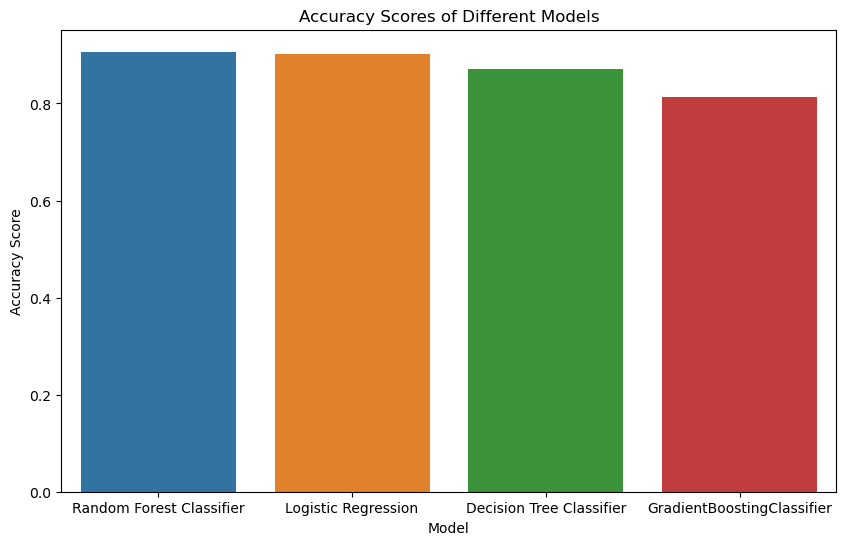

In [61]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=models.sort_values(by = 'Accuracy Score', ascending = False), x='Model', y='Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.ylabel('Accuracy Score')
plt.show()

## Choosing the best model

In [62]:
input_data = xv_test[20]
prediction = RF.predict(input_data)
if prediction[0] == 1:
    print('Fake news')
else:
    print('Real news')

Fake news


In [63]:
data['content'][20]

'hillari crime famili end day u'

### Joblib

In [64]:
import joblib

In [65]:
joblib.dump(RF,"random forest")

['random forest']

## Conclusion

- After rigorously evaluating multiple machine learning algorithms on our dataset, we've derived compelling insights regarding     their performance in classifying news articles as real or fake. The Random Forest Classifier emerged as the top-performing       model, boasting an impressive accuracy score of 90.67%. Following closely behind is the Logistic Regression model, with an       accuracy score of 90.19%. Although the Decision Tree Classifier and GradientBoostingClassifier exhibited slightly lower         accuracy scores of 87.40% and 81.30% respectively, they still demonstrated considerable efficacy in distinguishing between       genuine and false news.
- This project underscores the potential of machine learning techniques in combatting misinformation. By employing sophisticated   algorithms and leveraging structured datasets, we've laid the groundwork for developing robust tools capable of discerning the   authenticity of news articles with a high degree of accuracy. Moving forward, further refinements and optimizations could       enhance the performance of these models, potentially bolstering their utility in real-world applications aimed at safeguarding   the integrity of information dissemination.